# Plot

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

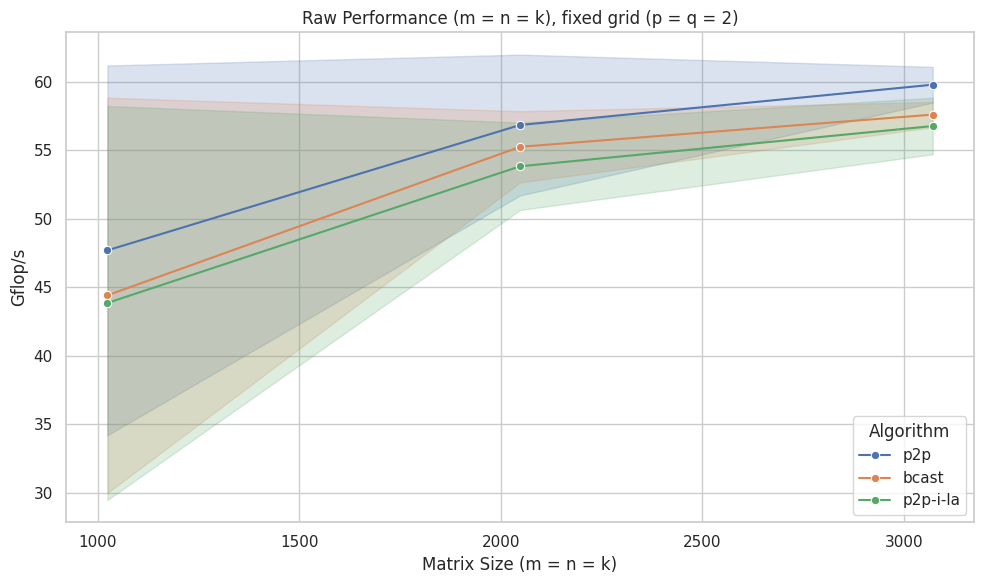

In [2]:
# Read the data
df = pd.read_csv("csv/bench.csv")
df['mnk'] = df['m']

# Get best lookahead for each matrix size (max Gflops)
p2p_i_la_df = df[df['algo'] == 'p2p-i-la']
best_lookaheads = (p2p_i_la_df.groupby(['mnk', 'lookahead'])['gflops']
                   .mean()
                   .reset_index()
                   .sort_values('gflops', ascending=True)
                   .drop_duplicates('mnk'))
best_lookaheads = best_lookaheads[['mnk', 'lookahead']]

# Merge to get only the rows with best lookaheads
best_p2p_i_la = pd.merge(p2p_i_la_df, best_lookaheads, on=['mnk', 'lookahead'])

# Combine with the other algorithms
other_algos = df[~df['algo'].str.startswith('p2p-i-la')]
combined_df = pd.concat([other_algos, best_p2p_i_la])

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, x="mnk", y="gflops", hue="algo", 
             estimator="mean", errorbar="sd", marker="o")

plt.title("Raw Performance (m = n = k), fixed grid (p = q = 2)")
plt.xlabel("Matrix Size (m = n = k)")
plt.ylabel("Gflop/s")
plt.legend(title="Algorithm")
plt.tight_layout()
plt.show()

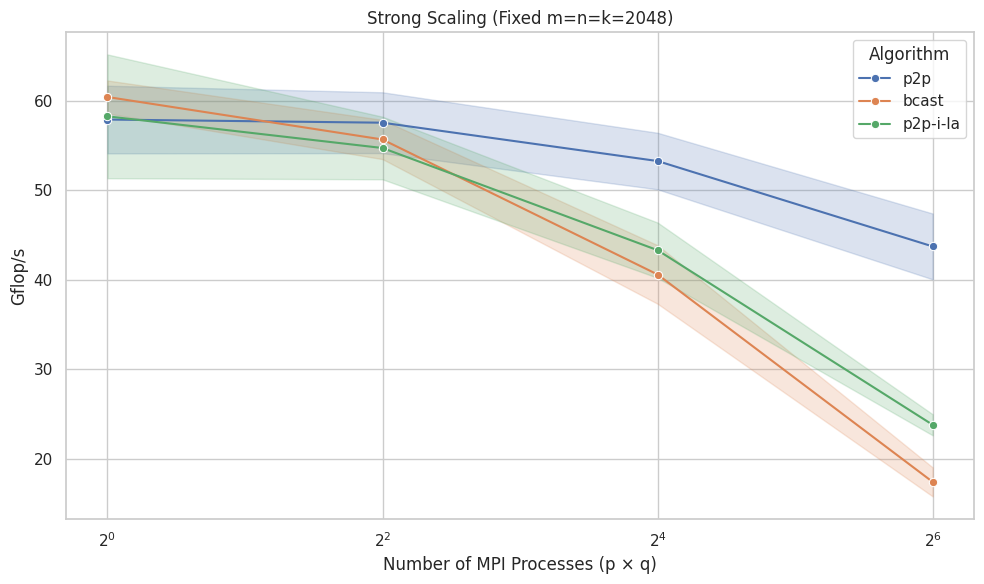

In [3]:
# Display the performance of the GEMM algorithms with varying number of nodes
df = pd.read_csv("csv/bench_strong.csv")
df["procs"] = df["p"] * df["q"]

# For p2p-i-la, find the best lookahead for each process count
p2p_i_la_df = df[df['algo'] == 'p2p-i-la']
best_lookaheads = (p2p_i_la_df.groupby(['procs', 'lookahead'])['gflops']
                   .mean()
                   .reset_index()
                   .sort_values('gflops', ascending=True)
                   .drop_duplicates('procs'))
best_lookaheads = best_lookaheads[['procs', 'lookahead']]

# Merge to get only the rows with best lookaheads
best_p2p_i_la = pd.merge(p2p_i_la_df, best_lookaheads, on=['procs', 'lookahead'])

# Combine with the other algorithms
other_algos = df[~df['algo'].str.startswith('p2p-i-la')]
combined_df = pd.concat([other_algos, best_p2p_i_la])

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, x="procs", y="gflops", hue="algo", 
             estimator="mean", errorbar="sd", marker="o")

plt.title("Strong Scaling (Fixed m=n=k=2048)")
plt.xlabel("Number of MPI Processes (p × q)")
plt.ylabel("Gflop/s")
plt.legend(title="Algorithm")
plt.xscale("log", base=2)
plt.xticks([1, 4, 16, 64])
plt.tight_layout()
plt.show()

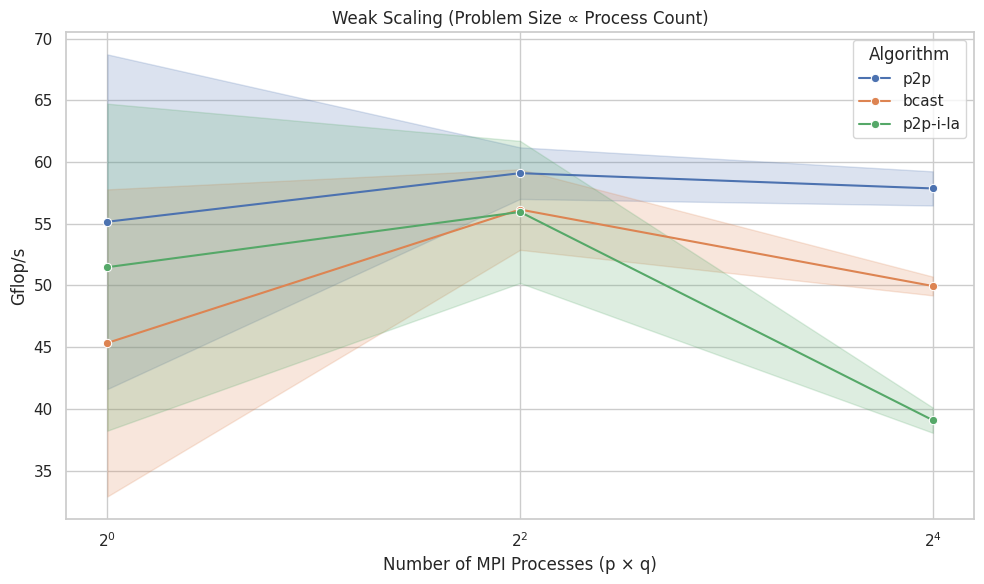

In [4]:
# Display the performance of the GEMM algorithms with increasing problem size and number of nodes
df = pd.read_csv("csv/bench_weak.csv")
df["procs"] = df["p"] * df["q"]

# For p2p-i-la, find the best lookahead for each process count
p2p_i_la_df = df[df['algo'] == 'p2p-i-la']
best_lookaheads = (p2p_i_la_df.groupby(['procs', 'lookahead'])['gflops']
                   .mean()
                   .reset_index()
                   .sort_values('gflops', ascending=True)
                   .drop_duplicates('procs'))
best_lookaheads = best_lookaheads[['procs', 'lookahead']]

# Merge to get only the rows with best lookaheads
best_p2p_i_la = pd.merge(p2p_i_la_df, best_lookaheads, on=['procs', 'lookahead'])

# Combine with the other algorithms
other_algos = df[~df['algo'].str.startswith('p2p-i-la')]
combined_df = pd.concat([other_algos, best_p2p_i_la])

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, x="procs", y="gflops", hue="algo", 
             estimator="mean", errorbar="sd", marker="o")

plt.title("Weak Scaling (Problem Size ∝ Process Count)")
plt.xlabel("Number of MPI Processes (p × q)")
plt.ylabel("Gflop/s")
plt.legend(title="Algorithm")
plt.xscale("log", base=2)
plt.xticks([1, 4, 16])
plt.tight_layout()
plt.show()

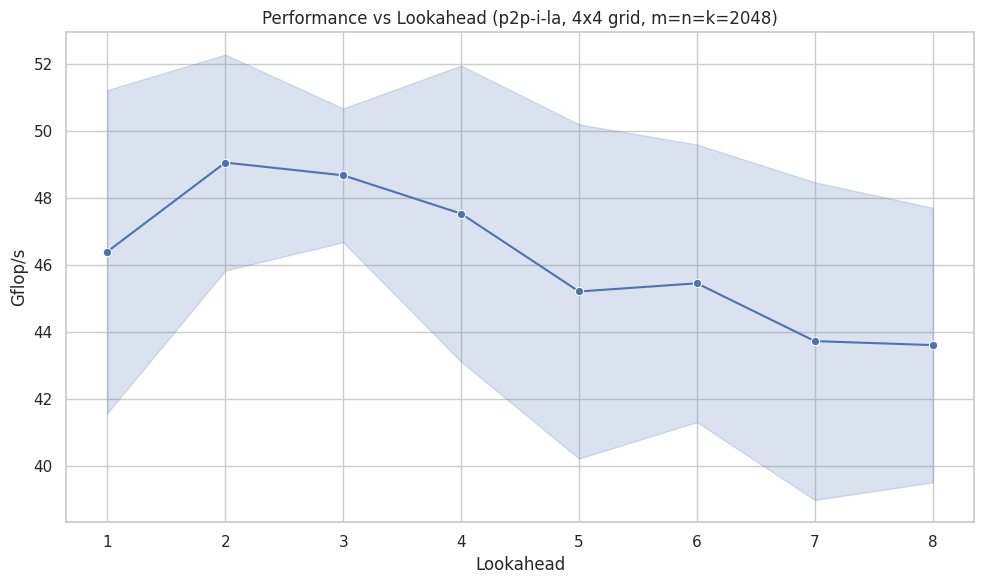

In [5]:
df = pd.read_csv("csv/bench_lookahead.csv")

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="lookahead", y="gflops", estimator="mean", errorbar="sd", marker="o")

plt.title("Performance vs Lookahead (p2p-i-la, 4x4 grid, m=n=k=2048)")
plt.xlabel("Lookahead")
plt.ylabel("Gflop/s")

plt.tight_layout()
plt.show()